# 4.2

In [1]:
import operator

def max_min( dictionary ):
    max_el = max(dictionary.items(), key=operator.itemgetter(1))[0]
    min_el = min(dictionary.items(), key=operator.itemgetter(1))[0]
    return "\tMAX({}) : {}\n\tMIN({}) : {}".format(
        max_el,
        dictionary[max_el],
        min_el,
        dictionary[min_el],
    )

def latex( name,  dictionary ):
    max_el = max(dictionary.items(), key=operator.itemgetter(1))[0]
    min_el = min(dictionary.items(), key=operator.itemgetter(1))[0]
    return "\tmax & {0}(x)= {0}({1})={2}\n\tmin & {0}(x)={0}({3})={4}".format(
        name,
        max_el,
        dictionary[max_el], 
        min_el,
        dictionary[min_el],
    )

def min_max_result(points, Z_1_L, Z_1_U, Z_2_L, Z_2_U):

    Z_1_L_D = {key:Z_1_L(point[0], point[1]) for key, point in points.items()}
    print("Z1L: Pesimist\n {}\n".format( latex("Z_{1L}", Z_1_L_D)))

    Z_1_U_D = {key:Z_1_U(point[0], point[1]) for key, point in points.items()}
    print("Z1U: Optimist\n {}\n".format( latex("Z_{1U}", Z_1_U_D)))


    Z_2_L_D = {key:Z_2_L(point[0], point[1]) for key, point in points.items()}
    print("Z2L: Optimist\n {}\n".format( latex("Z_{2L}", Z_2_L_D)))

    Z_2_U_D = {key:Z_2_U(point[0], point[1]) for key, point in points.items()}
    print("Z2U: Optimist\n {}\n".format( latex("Z_{2U}", Z_2_U_D)))


def print_points(points):
    strings = [ "{:>9} ".format(i) for i in points.keys() ]
    print( '{:<20}  {}'.format("", "|".join(strings)) )
    print("-"*(76))
    for func, callback in funcs.items():

        strings = [callback(point[0], point[1]) for point in points.values()]

        strings = [ " {:>2.4f} ".format(i) for i in strings ]
        strings = [ "{:>10}".format(i) for i in strings ]

        print( '{:<20}: {}'.format(func, "|".join(strings)) )

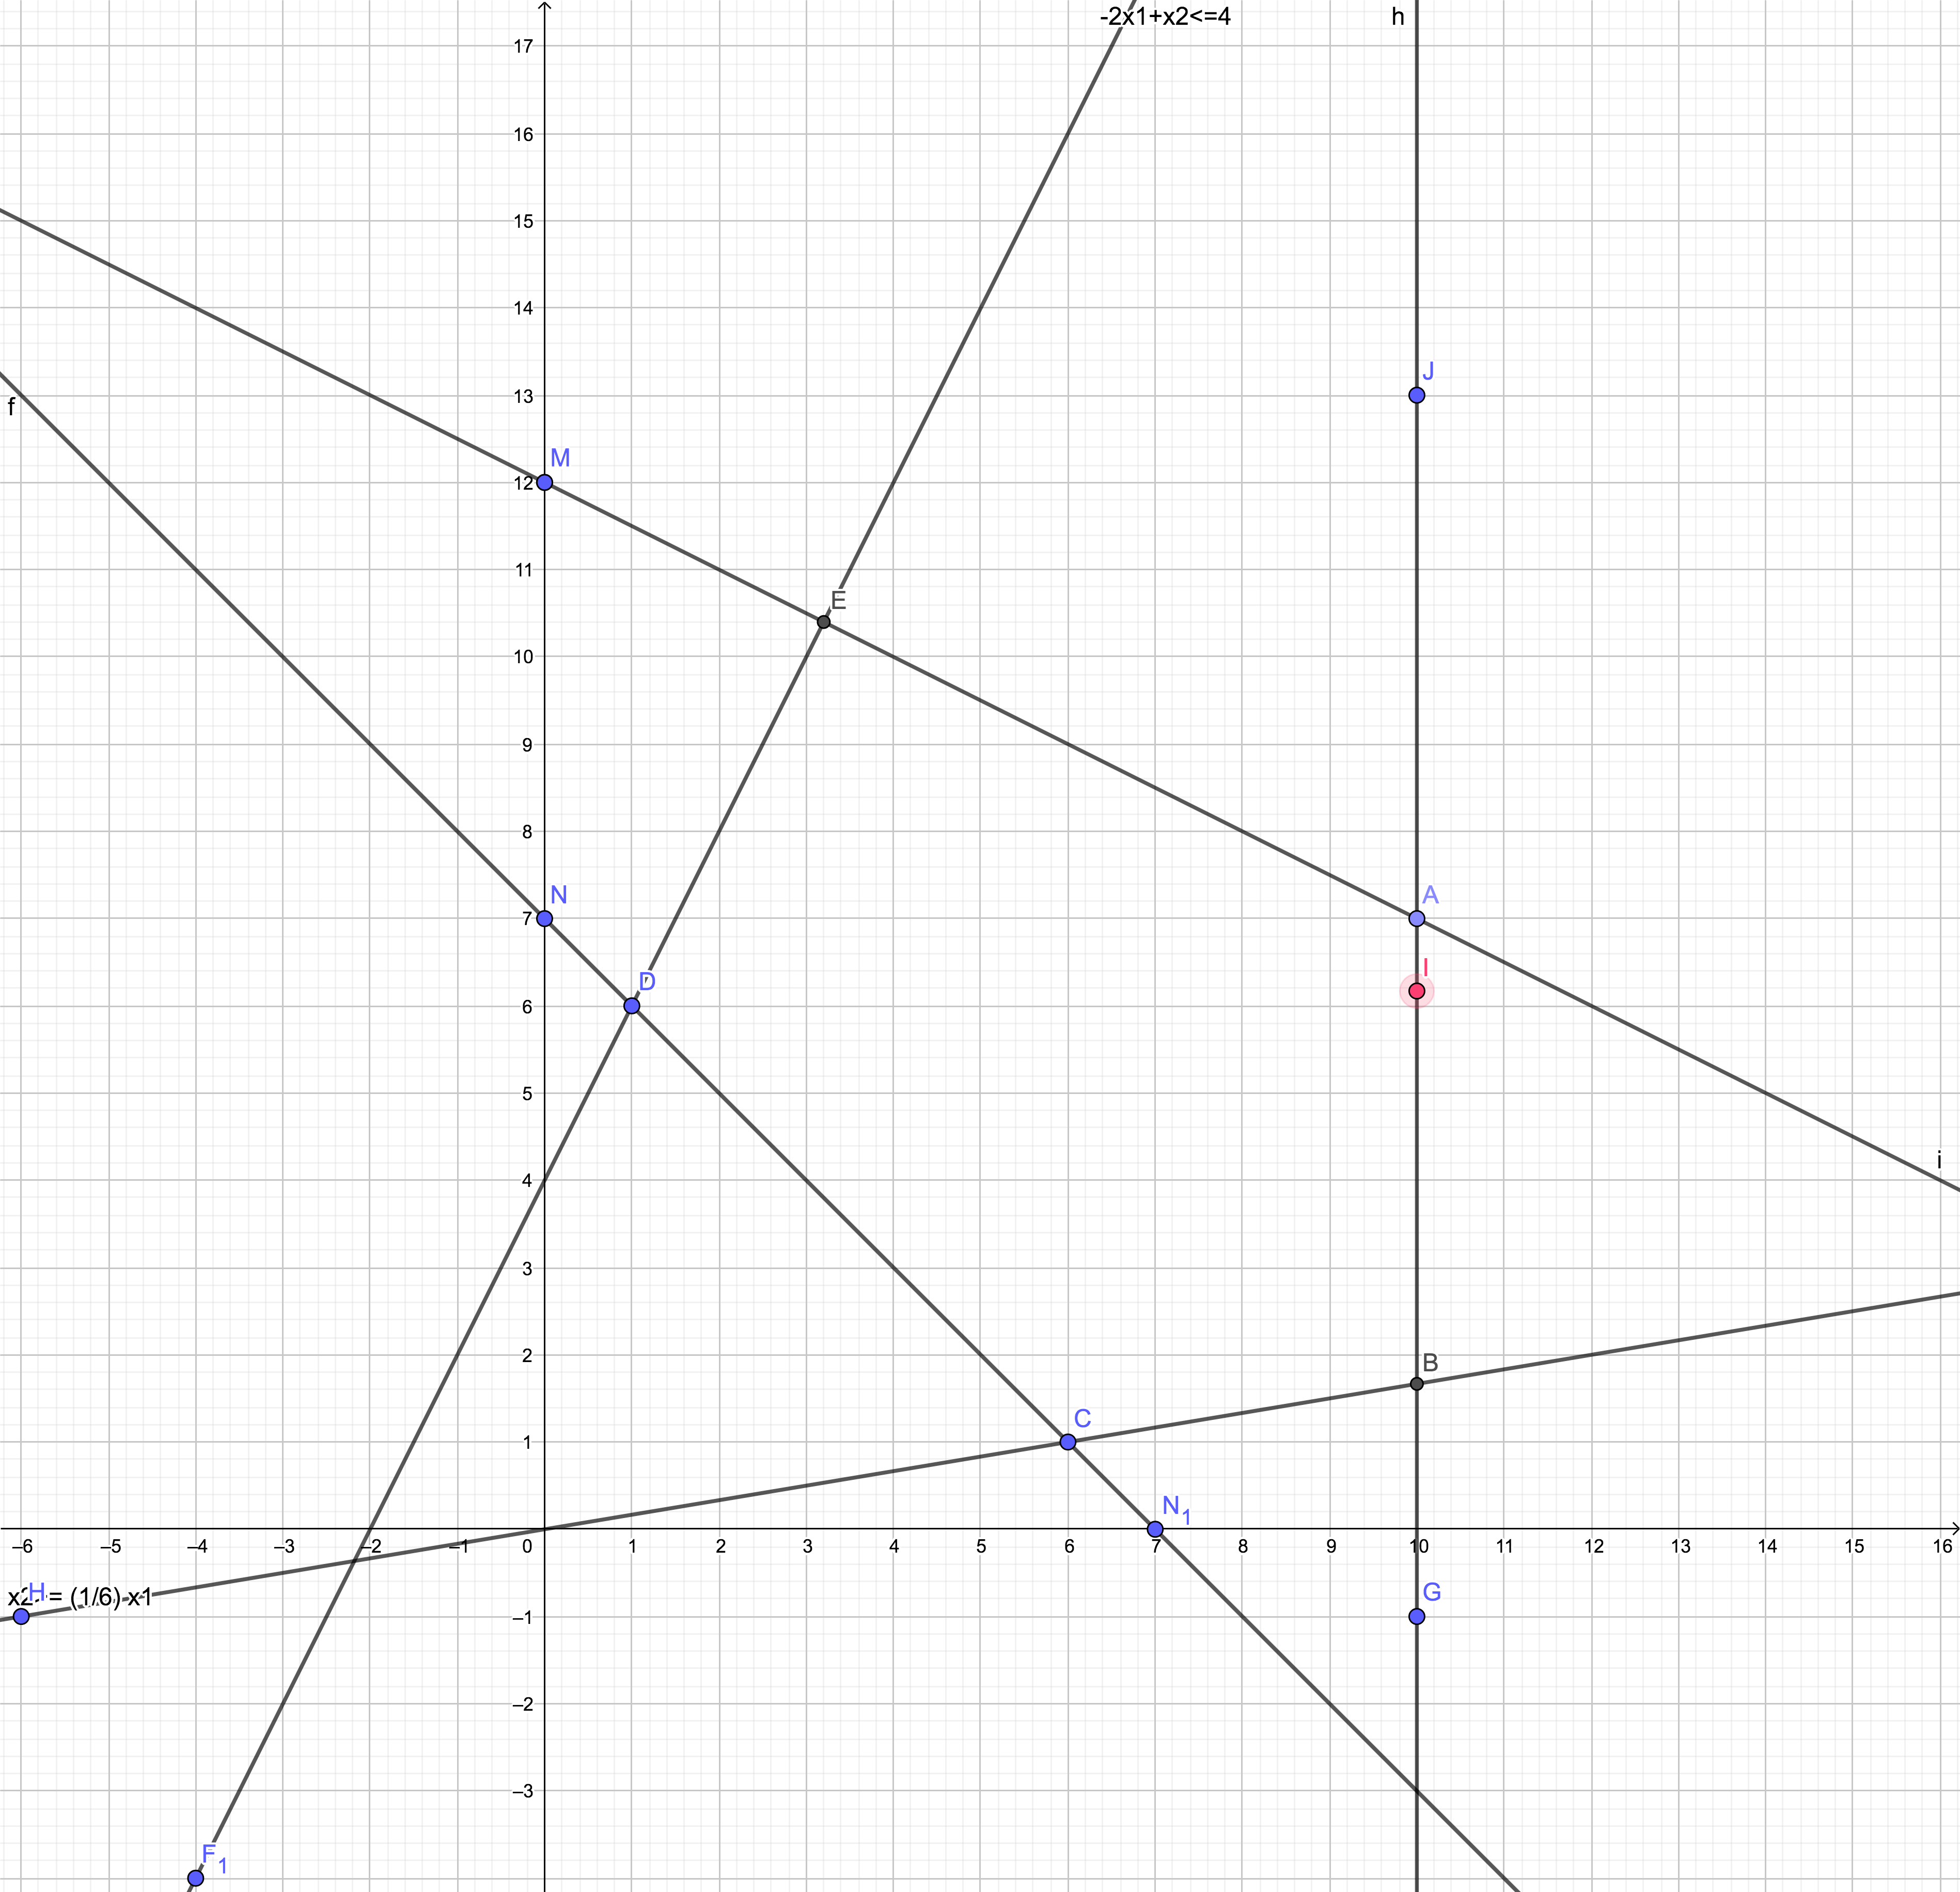

In [2]:
from collections import OrderedDict as dict

points = dict({
    'A' : (10, 7),
    'B' : (10, 1+2/3),
    'C' : (6, 1),
    'D' : (1, 6),
    'E' : (3.2, 10.4),
})

### Part 1

In [3]:
funcs = {
    'x1+4*x2' : (lambda x1, x2: x1+4*x2),
    '2*x1-2*x2' : (lambda x1, x2: 2*x1-2*x2),
}

In [4]:
print_points(points)

                              A |        B |        C |        D |        E 
----------------------------------------------------------------------------
x1+4*x2             :   38.0000 |  16.6667 |  10.0000 |  25.0000 |  44.8000 
2*x1-2*x2           :    6.0000 |  16.6667 |  10.0000 | -10.0000 | -14.4000 


In [5]:
## E-B

Знаходимо точки що задовольняють наш розвязок (`max` для критерія максимізації і `min` для критерія мінімізації)

* $ 
\text{max} \qquad W_{1}^{'} = \dfrac{f^0_1-f_1(x)}{f^0_1-f_{1_{max}}} = \dfrac{44.8 - (x_1+4x_2) }{44.8-10}
$
---
* $
\text{max} \qquad W_{2}^{'} = \dfrac{f^0_2-f_2(x)}{f^0_2-f_{2_{min}}} = \dfrac{16.667 - (2x_1-2x_2) }{16.667+14.4}
$

### Загальна форма

$$
max \to W_1 = \dfrac{f^0_1 - f(x)}{f^0_1 - f^0_{1_{min}} }
$$

---

$$
min \to W_2 = \dfrac{f(x)-f^0_2}{f^0_{2_{max}} - f^0_2 }
$$


Розвяжемо систему рівнянть методом [Гауса](https://matrix.reshish.ru/gauss-jordanElimination.php)

```
-38.54 * x1 + 193.84 * x2 = 811.72
         x1               = 10
```

$$
x_1 = 100
\qquad
x_2 = 6.175815105241435
$$


### Part 2

Критерії:

* $max \to C_{11}x_1 + C_{12}x_2$
* $max \to C_{21}x_1 + C_{22}x_2$

Обмеження:
`тіж`

Функція належності

1. $ \mu(C_{ij}) = \dfrac{2}{2+(C-\overline{C}_{ij})^2} \geq 0.8$
2. $ \mu(C_{ij}) = \dfrac{2}{0.8} \leq 2+(C-\overline{C}_{ij})^2 $
3. $ \mu(C_{ij}) = \dfrac{2}{0.8} -2 \leq (C-\overline{C}_{ij})^2 $
4. $ \mu(C_{ij}) = \dfrac{1}{2} \leq |C-\overline{C}_{ij}| $
5. $ \mu(C_{ij}) = \overline{C}_{ij} - \dfrac{1}{2} \leq C_{ij} \leq \overline{C}_{ij} + \dfrac{1}{2}$



Дивимось на наші середні значення $C_{ij}$

* $C_{11}$ = `1`
* $C_{12}$ = `4`
* $C_{21}$ = `2`
* $C_{22}$ = `-2`

----

* $C_{11}$ : $ 1-1/2 \leq C_{11} \leq 1+1/2 $
* $C_{12}$ : $ 4-1/2 \leq C_{12} \leq 4+1/2 $
* $C_{21}$ : $ 2-1/2 \leq C_{21} \leq 2+1/2 $
* $C_{22}$ : $ -2-1/2 \leq C_{22} \leq -2+1/2 $

---

* $C_{11}$ : $ 0.5 \leq C_{11} \leq 1.5 $
* $C_{12}$ : $ 3.5 \leq C_{12} \leq 4.5 $
* $C_{21}$ : $ 1.5 \leq C_{21} \leq 2.5 $
* $C_{22}$ : $ -2.5 \leq C_{22} \leq -1.5 $

Підставляємо в наші критерії

* $Z_{1L} = 0.5x_1 + 1.5x_2$
* $Z_{1U} = 3.5x_1 + 4.5x_2$
* $Z_{2L} = 1.5x_1 + 2.5x_2$
* $Z_{2U} = 2.5x_1 + 1.5x_2$



In [6]:
# далі ітеравивно шукаємо результати по точкам

Z_1_L = lambda x1,x2: 0.5*x1+1.5*x2 
Z_1_U = lambda x1,x2: 3.5*x1+4.5*x2 
Z_2_L = lambda x1,x2: 1.5*x1+2.5*x2 
Z_2_U = lambda x1,x2: 2.5*x1-1.5*x2 


min_max_result(points, Z_1_L, Z_1_U, Z_2_L, Z_2_U)

Z1L: Pesimist
 	max & Z_{1L}(x)= Z_{1L}(E)=17.200000000000003
	min & Z_{1L}(x)=Z_{1L}(C)=4.5

Z1U: Optimist
 	max & Z_{1U}(x)= Z_{1U}(A)=66.5
	min & Z_{1U}(x)=Z_{1U}(C)=25.5

Z2L: Optimist
 	max & Z_{2L}(x)= Z_{2L}(A)=32.5
	min & Z_{2L}(x)=Z_{2L}(C)=11.5

Z2U: Optimist
 	max & Z_{2U}(x)= Z_{2U}(B)=22.5
	min & Z_{2U}(x)=Z_{2U}(E)=-7.600000000000001



-----

$max \lambda$

* $(17.2 - 4.5) \lambda - (0.5x_1 + 1.5x_2) \leq - 4.5$
* $(66.5 - 22.5) \lambda - (3.5x_1 + 4.5x_2) \leq - 22.5$
* $(32.5 - 11.5) \lambda - (1.5x_1 + 2.5x_2) \leq - 11.5$
* $(22.5 +  7.6) \lambda - (2.5x_1 + 1.5x_2) \leq 7.6$